# FaceMaskClassification with CustomizedVGG16

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
import random

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from pandas.core.common import flatten

from keras.applications.vgg16 import VGG16

In [ ]:
## Reading the datafile
data = pd.read_csv("/kaggle/input/medical-masks-part1/df.csv")
data.head()

,ID,TYPE,USER_ID,GENDER,AGE,name,size_mb
0,1,1,1,MALE,25,000001_1_000001_MALE_25.jpg,1.801298
1,1,2,1,MALE,25,000001_2_000001_MALE_25.jpg,1.738558
2,1,3,1,MALE,25,000001_3_000001_MALE_25.jpg,1.799667
3,1,4,1,MALE,25,000001_4_000001_MALE_25.jpg,1.740264
4,2,1,2,MALE,23,000002_1_000002_MALE_23.jpg,1.549695


In [ ]:
## Total of 40000images (10000images for each class)
data.shape

(40000, 7)

In [ ]:
## No-Null values
data.isnull().sum()

ID         0
TYPE       0
USER_ID    0
GENDER     0
AGE        0
name       0
size_mb    0
dtype: int64

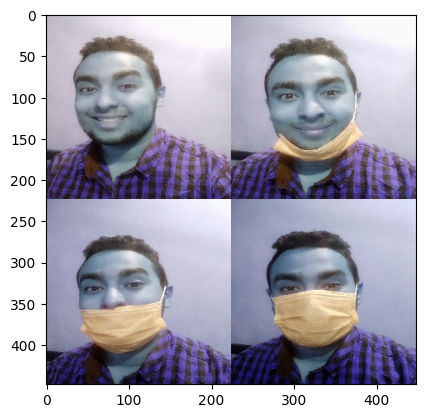

In [59]:
TEST = '/content/drive/MyDrive/TaskMask/test'

count = 0
grid = np.zeros((2 * 224, 2 * 224, 3), dtype=np.uint8)
for imageFile in os.listdir(TEST):
  image = cv2.imread(os.path.join(TEST, imageFile))
  image = cv2.resize(image, (224, 224))
  count += 1

  if count == 1:
    grid[0:image.shape[0], 0:image.shape[1]] = image
  elif count == 2:
    grid[0:image.shape[0], image.shape[1]:] = image
  elif count == 3:
    grid[image.shape[0]:, 0:image.shape[1]] = image
  else:
    grid[image.shape[0]:, image.shape[1]:] = image

plt.imshow(grid)
plt.show()

## Data PreProcessing and Augmentation

In [ ]:
## Creating Dir for Prepared and Augmented Data
os.makedirs(os.path.join('/kaggle/working/', 'train'))
os.makedirs(os.path.join('/kaggle/working/', 'valid'))

In [ ]:
os.makedirs(os.path.join('/kaggle/working/train', '0'))
os.makedirs(os.path.join('/kaggle/working/train', '1'))
os.makedirs(os.path.join('/kaggle/working/train', '2'))
os.makedirs(os.path.join('/kaggle/working/train', '3'))

os.makedirs(os.path.join('/kaggle/working/valid', '0'))
os.makedirs(os.path.join('/kaggle/working/valid', '1'))
os.makedirs(os.path.join('/kaggle/working/valid', '2'))
os.makedirs(os.path.join('/kaggle/working/valid', '3'))

In [ ]:
## Function for changing Hue Parameter in image
def hue_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image

In [ ]:
## Function to change Lighting in the image
def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    return image

In [ ]:
## Function to change Saturation of input image
def saturation_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image

In [ ]:
## Data PreProcessing and Augmentation

# Input data DIR
DIR = '/kaggle/input/medical-masks-part1/images'

# Standard Image-Size 256x256
w = 256
h = 256

# for each file in InputDataDIR
for imageFile in os.listdir(DIR):
    # read class of image, and userId for uniquely save output image
    class_index = int(imageFile.split('_')[1])-1
    user_id     = int(imageFile.split('_')[2])

    # TRY reading image (if not corrupt or invalid)
    try:
        image = cv2.imread(os.path.join(DIR, imageFile))

        try:
            # resize
            image = cv2.resize(image,(w,h))

            # data-augmentation
            image_hflip   = cv2.flip(image, 1)
            image_hue200  = hue_image(image,200)
            image_ligth30 = add_light(image,3.0)
            image_ligth06 = add_light(image,0.6)
            image_sta150  = saturation_image(image,150)

            # add all of the images in a list
            images      = [('image', image), ('image_hflip', image_hflip), ('image_hue200', image_hue200), ('image_ligth30', image_ligth30), ('image_ligth06', image_ligth06), ('image_sta150', image_sta150)]

            # select one of these for validation
            valid_image = random.choice(images)
            images.remove(valid_image)

            # Saving Validation Image
            cv2.imwrite(os.path.join(f'/kaggle/working/valid/{class_index}', f'{class_index}_{user_id}_{valid_image[0]}.jpg'), valid_image[1])

            # Saving Train Images (all except validation)
            for item in images:
                cv2.imwrite(os.path.join(f'/kaggle/working/train/{class_index}', f'{class_index}_{user_id}_{item[0]}.jpg'), item[1])
        except:
            print("This image is corrupt - ", imageFile)
    except:
        pass
print("Data-Preparation, and Data-Augmentation Done !!!")

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Data-Preparation, and Data-Augmentation Done !!!


# CNN Model

## Training

In [ ]:
## Using Keras DataGenerator
## Since the training input data is huge,
## Keras DataGenerator takes in the input directory and prepares data-label in batchs
train_dg = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

valid_dg = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 136191 files belonging to 4 classes.
Found 35870 files belonging to 4 classes.


In [ ]:
## Function to Normalize each pixel value to (0, 255)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dg = train_dg.map(process)
valid_dg = valid_dg.map(process)

In [ ]:
## Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_27 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_28 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                     

In [ ]:
## ADAM Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dg, epochs=10, validation_data=valid_dg)

Epoch 1/10
4256/4256 [==============================] - 406s 95ms/step - loss: 1.4236 - accuracy: 0.4125 - val_loss: 0.9834 - val_accuracy: 0.5308
Epoch 2/10
4256/4256 [==============================] - 401s 94ms/step - loss: 0.8685 - accuracy: 0.5677 - val_loss: 0.8373 - val_accuracy: 0.5960
Epoch 3/10
4256/4256 [==============================] - 400s 94ms/step - loss: 0.7676 - accuracy: 0.6091 - val_loss: 1.1780 - val_accuracy: 0.5082
Epoch 4/10
4256/4256 [==============================] - 400s 94ms/step - loss: 0.7547 - accuracy: 0.6123 - val_loss: 0.6674 - val_accuracy: 0.6565
Epoch 5/10
4256/4256 [==============================] - 399s 94ms/step - loss: 0.7247 - accuracy: 0.6261 - val_loss: 0.5678 - val_accuracy: 0.6910
Epoch 6/10
4256/4256 [==============================] - 398s 94ms/step - loss: 0.7330 - accuracy: 0.6253 - val_loss: 0.6398 - val_accuracy: 0.6541
Epoch 7/10
4256/4256 [==============================] - 399s 94ms/step - loss: 0.7071 - accuracy: 0.6347 - val_loss: 0

In [ ]:
## Model.Save after 10Epochs
model.save('/kaggle/working/CnnModel_10Epochs.keras')

In [ ]:
## Restarting model training till 25 epochs
history2 = model.fit(train_dg, initial_epoch=10, epochs=25, validation_data=valid_dg)

Epoch 11/25
4256/4256 [==============================] - 400s 94ms/step - loss: 0.6821 - accuracy: 0.6530 - val_loss: 0.5649 - val_accuracy: 0.6904
Epoch 12/25
4256/4256 [==============================] - 398s 94ms/step - loss: 0.6921 - accuracy: 0.6458 - val_loss: 0.6106 - val_accuracy: 0.6612
Epoch 13/25
4256/4256 [==============================] - 400s 94ms/step - loss: 0.6754 - accuracy: 0.6528 - val_loss: 0.5453 - val_accuracy: 0.6994
Epoch 14/25
4256/4256 [==============================] - 399s 94ms/step - loss: 0.6872 - accuracy: 0.6549 - val_loss: 0.5743 - val_accuracy: 0.7115
Epoch 15/25
4256/4256 [==============================] - 399s 94ms/step - loss: 0.5897 - accuracy: 0.7681 - val_loss: 0.6729 - val_accuracy: 0.7618
Epoch 16/25
4256/4256 [==============================] - 399s 94ms/step - loss: 0.5333 - accuracy: 0.8088 - val_loss: 0.5226 - val_accuracy: 0.8095
Epoch 17/25
4256/4256 [==============================] - 400s 94ms/step - loss: 0.4893 - accuracy: 0.8278 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3427/4256 [=======================>......] - ETA: 1:11 - loss: 0.4583 - accuracy: 0.8448

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4256/4256 [==============================] - 399s 94ms/step - loss: 0.4674 - accuracy: 0.8389 - val_loss: 0.3107 - val_accuracy: 0.9133
Epoch 21/25
2682/4256 [=================>............] - ETA: 2:15 - loss: 0.4616 - accuracy: 0.8441

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4256/4256 [==============================] - 399s 94ms/step - loss: 0.4389 - accuracy: 0.8531 - val_loss: 0.3879 - val_accuracy: 0.8676
Epoch 23/25
4256/4256 [==============================] - 400s 94ms/step - loss: 0.4286 - accuracy: 0.8575 - val_loss: 0.5600 - val_accuracy: 0.7594
Epoch 24/25
4256/4256 [==============================] - 400s 94ms/step - loss: 0.4522 - accuracy: 0.8478 - val_loss: 0.5492 - val_accuracy: 0.8296
Epoch 25/25
4256/4256 [==============================] - 399s 94ms/step - loss: 0.4244 - accuracy: 0.8592 - val_loss: 0.3296 - val_accuracy: 0.9101


In [ ]:
## Model.Save after 25Epochs
model.save('/kaggle/working/CnnModel_25Epochs.keras')

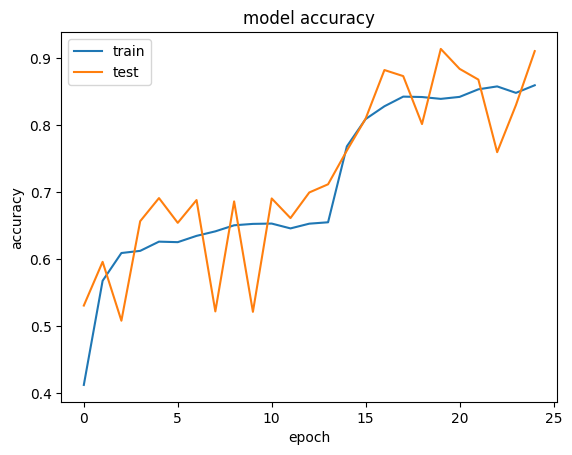

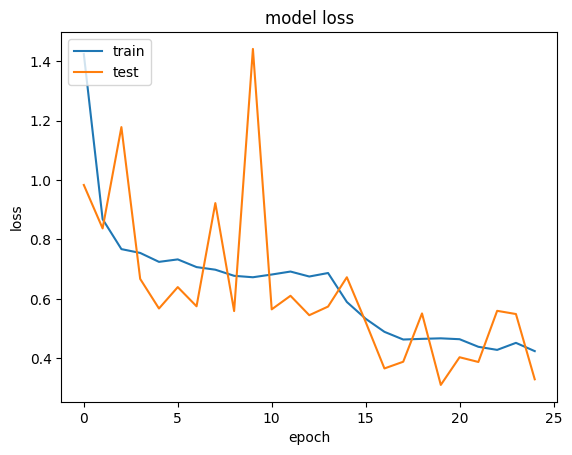

In [ ]:
## Plotting Accuracy and Loss over 25Epochs
## Checking for UnderFit and OverFit

## From Accuracy and Loss Plot, No UnderFitting or OverFitting observed
## Unstable training though (ValidationLoss)

train_accuracy = list(flatten([history.history['accuracy'], history2.history['accuracy']]))
valid_accuracy = list(flatten([history.history['val_accuracy'], history2.history['val_accuracy']]))

train_loss = list(flatten([history.history['loss'], history2.history['loss']]))
valid_loss = list(flatten([history.history['val_loss'], history2.history['val_loss']]))

plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing

1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0.]]


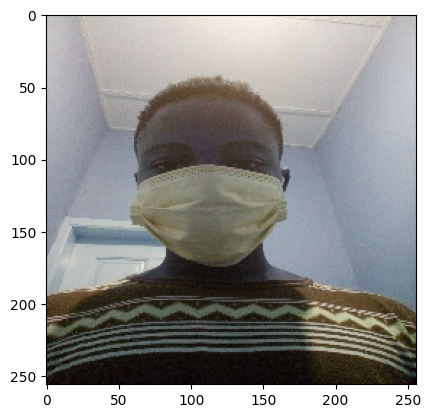

In [ ]:
TEST_DIR = '/kaggle/working/train/0/'

count = 0
for imageFile in os.listdir(TEST_DIR):
    test_img = cv2.imread(os.path.join(TEST_DIR, imageFile))
    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3))
    plt.imshow(test_img)
    print(model.predict(test_input))
    break

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 1.]]


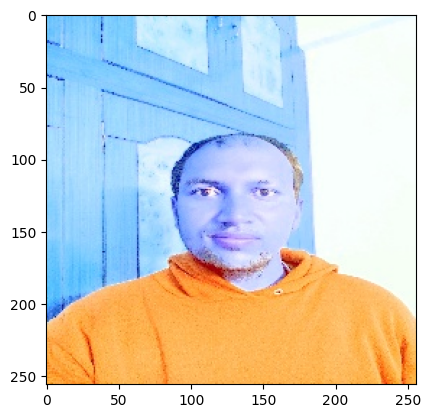

In [ ]:
TEST_DIR = '/kaggle/working/train/3/'
for imageFile in os.listdir(TEST_DIR):
    test_img = cv2.imread(os.path.join(TEST_DIR, imageFile))
    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3))
    plt.imshow(test_img)
    print(model.predict(test_input))
    break

# VGG16 + CustomLayer

## Training

In [ ]:
## Creating DataGenerator with inout image size of 224x244 (VGG16)
train_dg = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))

valid_dg = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))

Found 136191 files belonging to 4 classes.
Found 35870 files belonging to 4 classes.


In [ ]:
## Normalizing each pixel value to (0, 255)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dg = train_dg.map(process)
valid_dg = valid_dg.map(process)

In [ ]:
## Downloading VGG16 Net
vgg = VGG16()

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
## Creating NewModel with all VGG16 Layers except last layer
myVgg = Sequential()
for layer in vgg.layers[:-1]:
    myVgg.add(layer)

myVgg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
## Freezing all the layers in customVGG16
for layer in myVgg.layers:
    layer.trainable = False

myVgg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
## Adding Last layer for decision making
myVgg.add(Dense(4, activation='softmax'))
myVgg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
myVgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_myVgg = myVgg.fit(train_dg, epochs=10, validation_data=valid_dg)

Epoch 1/10
4256/4256 [==============================] - 783s 183ms/step - loss: 0.8340 - accuracy: 0.6554 - val_loss: 0.6782 - val_accuracy: 0.7296
Epoch 2/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.7096 - accuracy: 0.7138 - val_loss: 0.6502 - val_accuracy: 0.7452
Epoch 3/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.6724 - accuracy: 0.7292 - val_loss: 0.6446 - val_accuracy: 0.7487
Epoch 4/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.6502 - accuracy: 0.7404 - val_loss: 0.6955 - val_accuracy: 0.7290
Epoch 5/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.6313 - accuracy: 0.7485 - val_loss: 0.7145 - val_accuracy: 0.7188
Epoch 6/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.6204 - accuracy: 0.7528 - val_loss: 0.6702 - val_accuracy: 0.7361
Epoch 7/10
4256/4256 [==============================] - 766s 180ms/step - loss: 0.6115 - accuracy: 0.7584 - val_

In [ ]:
myVgg.save('/kaggle/working/myVggModel_10Epochs.keras')

# Testing model using camera input

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.13.0

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [55]:
myVggModel = keras.saving.load_model('/content/drive/MyDrive/TaskMask/myVggModel_10Epochs.keras')

In [56]:
def putTextOnImg(image, text, color):
  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (2, 8)
  fontScale = 0.3
  thickness = 1

  image = cv2.putText(image, text, org, font,  fontScale, color, thickness, cv2.LINE_AA)
  return image

1/1 [==============================] - 0s 438ms/step


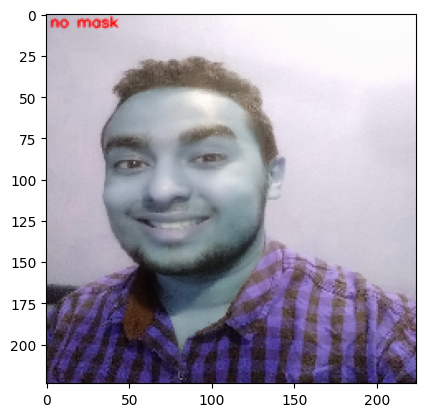

1/1 [==============================] - 0s 354ms/step


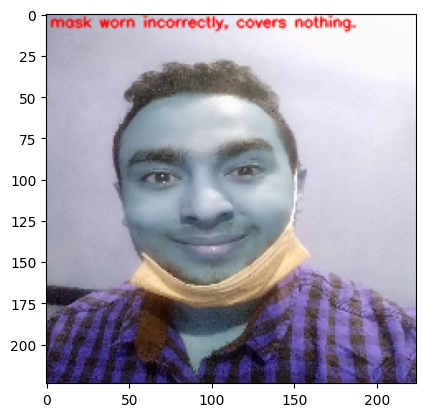

1/1 [==============================] - 0s 350ms/step


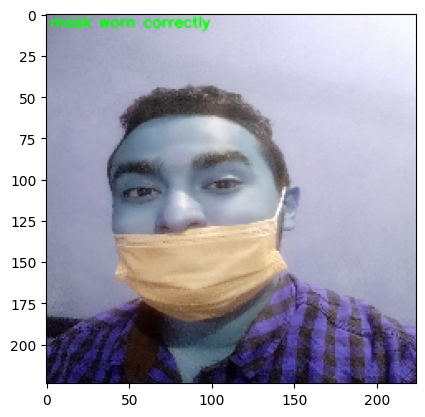

1/1 [==============================] - 0s 320ms/step


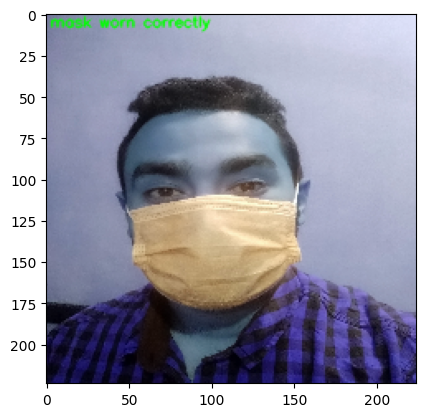

In [57]:
# for each file in InputDataDIR
TEST = '/content/drive/MyDrive/TaskMask/test'
classIndex = ['mask worn correctly', 'mask worn incorrectly, covers mouth', 'mask worn incorrectly, covers nothing.', 'no mask']
color = [(0, 255, 0), (0, 255, 0), (255, 0, 0), (255, 0, 0)]

for imageFile in os.listdir(TEST):
  test_img = cv2.imread(os.path.join(TEST, imageFile))
  test_img = cv2.resize(test_img, (224, 224))
  test_input = test_img.reshape((1, 224, 224, 3))
  pred = myVggModel.predict(test_input)
  predClass = np.argmax(pred)

  test_img = putTextOnImg(test_img, classIndex[predClass], color[predClass])
  plt.imshow(test_img)
  plt.show()